In [1]:
#  from kaggle.api.kaggle_api_extended import KaggleApi

#  api = KaggleApi()
#  api.authenticate()
#  print("Kaggle API is installed and working!")
# from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize and authenticate the Kaggle API
# api = KaggleApi()
# api.authenticate()

# Test the API (e.g., list datasets)
#print(api.datasets_list())
import os

import os

from kaggle.api.kaggle_api_extended import KaggleApi

# Hardcode Kaggle API credentials temporarily
os.environ['KAGGLE_USERNAME'] = "tomekosuchowski"
os.environ['KAGGLE_KEY'] = "678afd0466b69c907aabc7eb0620f1e0"

api = KaggleApi()
api.authenticate()
print("Kaggle API is authenticated and ready to use!")



Kaggle API is authenticated and ready to use!


In [2]:
import os
print("KAGGLE_USERNAME:", os.getenv("KAGGLE_USERNAME"))
print("KAGGLE_KEY:", os.getenv("KAGGLE_KEY"))


KAGGLE_USERNAME: tomekosuchowski
KAGGLE_KEY: 678afd0466b69c907aabc7eb0620f1e0


In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

print("Kaggle API authentication successful!")


Kaggle API authentication successful!


In [4]:
competitions = api.competitions_list()
for comp in competitions[:5]:  # Show first 5 competitions
    print(f"{comp.ref}: {comp.title}")


https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-2: AI Mathematical Olympiad - Progress Prize 2
https://www.kaggle.com/competitions/konwinski-prize: Konwinski Prize
https://www.kaggle.com/competitions/czii-cryo-et-object-identification: CZII - CryoET Object Identification
https://www.kaggle.com/competitions/equity-post-HCT-survival-predictions: CIBMTR - Equity in post-HCT Survival Predictions
https://www.kaggle.com/competitions/santa-2024: Santa 2024 - The Perplexity Permutation Puzzle


In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os
import kaggle
import plotly.io as pio
pio.templates.default = "plotly_white"
import pandas as pd
from pathlib import Path
from tqdm.autonotebook import tqdm
# %load_ext autoreload
# %autoreload 2
np.random.seed()
tqdm.pandas()

# Reading data to pandas dataframe
Let's use London Smart Meters dataset from Kaggle for the current exercise. The source of the data is from London Data Store and Jean-Michel D. has augumented the dataset with a few more details and packaged it as a Kaggle Dataset.

# About the Dataset
London Data Store, free and open data-sharing portal, provided this dataset, which was collected and enriched by Jean-Michel D and uploaded on Kaggle @ https://www.kaggle.com/jeanmidev/smart-meters-in-london. The dataset has energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014. Readings were taken at half hourly intervals. Some metadata about the households are also available as part of the dataset.

# Data Wrangling
The Kaggle dataset also has the time series data preprocessed on a daily level and combined all the separate files, etc. But let’s ignore those files and start with the raw files, which is in the hhblock_dataset folder.

In [7]:
os.makedirs("imgs/chapter_2", exist_ok=True)
source_data = Path("data/london_smart_meters/")
block_data_path = source_data/"hhblock_dataset"/"hhblock_dataset"

In [8]:
import os

print(f"Expected path: {block_data_path}")
print(f"Does path exist? {block_data_path.exists()}")
print(f"Is it a directory? {block_data_path.is_dir()}")
print("Available folders in 'data/london_smart_meters/':", os.listdir("data/london_smart_meters") if os.path.exists("data/london_smart_meters") else "Folder not found")


Expected path: data/london_smart_meters/hhblock_dataset/hhblock_dataset
Does path exist? True
Is it a directory? True
Available folders in 'data/london_smart_meters/': ['.DS_Store', 'hhblock_dataset']


In [9]:
import os
print(os.path.abspath("data/london_smart_meters.zip"))


/Users/tomaszosuchowski/data/london_smart_meters.zip


In [10]:
import os
print(os.path.exists("/Users/tomaszosuchowski/data/london_smart_meters/smart_meters.zip"))


False


In [11]:
block_data_path.mkdir(parents=True, exist_ok=True)



In [12]:
print(block_data_path.exists())  # Should now return True
print(block_data_path.is_dir())  # Should return True
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly. Refer to the Preface of the book or the Readme in the repo for expected data"


True
True


In [13]:
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly. Refer to the Preface of the book or the Readme in the repo for expected data"

# Converting the half hourly block level dataset into a time series data
Let's pick one block and see how we can transform the data.

In [14]:
print(block_data_path / "block_0.csv")  # Print the full path
print((block_data_path / "block_0.csv").exists())  # Check if the file exists


data/london_smart_meters/hhblock_dataset/hhblock_dataset/block_0.csv
False


In [15]:
print(os.listdir(block_data_path))


[]


In [16]:
import os
print(os.path.exists(block_data_path))  # Should return True if the path exists


True


In [17]:
import os
print(os.access(block_data_path, os.R_OK))  # Check read permission


file_path = os.path.join(block_data_path, "block_0.csv")
print("File exists:", os.path.exists(file_path))


True
File exists: False


In [18]:
os.makedirs("imgs/chapter_2", exist_ok=True)
source_data = Path("data/london_smart_meters/")
block_data_path = source_data/"hhblock_dataset"/"hhblock_dataset"

In [19]:
assert block_data_path.is_dir(), "Please check if the dataset has been downloaded properly."

# Converting the half hourly block level dataset into a time series data
Let's pick one block and see how we can transform the data.

In [91]:
import pandas as pd
from pathlib import Path

# Define path
block_data_path = Path("data/london_smart_meters/hhblock_dataset")
block_file = block_data_path / "block_0.csv"

# Check if the file exists before loading
if block_file.exists():
    block_df = pd.read_csv(block_file, parse_dates=False)
    
    # Convert 'day' column to datetime explicitly
    block_df.loc[:, 'day'] = pd.to_datetime(block_df['day'], yearfirst=True)
    
    # Unpivot the hourly columns ('hh_0' to 'hh_47') into a long format
    hourly_columns = [col for col in block_df.columns if col.startswith("hh_")]
    block_df = block_df.melt(
        id_vars=["LCLid", "day"],
        value_vars=hourly_columns,
        var_name="hour_block",
        value_name="energy_consumption"
    )
    
    # Create 'offset' column safely using the extracted hour from 'hour_block'
    block_df.loc[:, 'offset'] = block_df['hour_block'].str.replace("hh_", "").astype(int)

    # Create 'timestamp' column safely
    block_df.loc[:, 'timestamp'] = block_df['day'] + pd.to_timedelta(block_df['offset'] * 30, unit='m')

    # Add 'frequency' column
    freq = "30-minute"  # Assuming a 30-minute frequency
    block_df.loc[:, 'frequency'] = freq

    # Sort values
    ts_identifier = "LCLid"  # Assuming 'LCLid' is the time series identifier
    block_df = block_df.sort_values([ts_identifier, "timestamp"])

    # Drop unnecessary columns
    cols_to_drop = ["hour_block", "offset"]  # Add more column names as needed
    block_df = block_df.drop(columns=[col for col in cols_to_drop if col in block_df.columns])

    # Print final results for verification
    print("✅ Processing complete!")
    print("Final shape of block_df:", block_df.shape)
    print(block_df.head())

else:
    print(f"❌ Error: File not found – {block_file}")
    print("📌 Make sure you've downloaded and extracted the dataset.")


✅ Processing complete!
Final shape of block_df: (1213728, 5)
            LCLid        day  energy_consumption           timestamp  \
0       MAC000002 2012-10-13               0.263 2012-10-13 00:00:00   
25286   MAC000002 2012-10-13               0.269 2012-10-13 00:30:00   
50572   MAC000002 2012-10-13               0.275 2012-10-13 01:00:00   
75858   MAC000002 2012-10-13               0.256 2012-10-13 01:30:00   
101144  MAC000002 2012-10-13               0.211 2012-10-13 02:00:00   

        frequency  
0       30-minute  
25286   30-minute  
50572   30-minute  
75858   30-minute  
101144  30-minute  


In [21]:
# Define the file path
block_data_path = Path("data/london_smart_meters/hhblock_dataset")
block_file = block_data_path / "block_0.csv"

# Check if the file exists
if block_file.exists():
    print(f"✅ File found: {block_file}")
else:
    print(f"❌ File not found: {block_file}")
    print("📌 Make sure the dataset is uploaded and the path is correct.")


✅ File found: data/london_smart_meters/hhblock_dataset/block_0.csv


In [22]:
ls -la data/london_smart_meters/


total 16
drwxr-xr-x    4 tomaszosuchowski  staff    128 Jan 31 11:39 ./
drwxr-xr-x  440 tomaszosuchowski  staff  14080 Jan 29 18:11 ../
-rw-r--r--@   1 tomaszosuchowski  staff   6148 Jan 31 11:39 .DS_Store
drwxr-xr-x   11 tomaszosuchowski  staff    352 Jan 31 01:11 hhblock_dataset/


In [23]:
import os

search_path = "data/london_smart_meters/"
for root, dirs, files in os.walk(search_path):
    for file in files:
        if file.endswith(".csv"):
            print(f"Found: {os.path.join(root, file)}")


Found: data/london_smart_meters/hhblock_dataset/uk_bank_holidays.csv
Found: data/london_smart_meters/hhblock_dataset/block_1.csv
Found: data/london_smart_meters/hhblock_dataset/block_0.csv
Found: data/london_smart_meters/hhblock_dataset/weather_daily_darksky.csv
Found: data/london_smart_meters/hhblock_dataset/informations_households.csv
Found: data/london_smart_meters/hhblock_dataset/weather_hourly_darksky.csv
Found: data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv


In [24]:
import pandas as pd
from pathlib import Path

# Define the path to the dataset
block_data_path = Path("data/london_smart_meters/hhblock_dataset")
block_file = block_data_path / "block_0.csv"

# Load the CSV file and process it
if block_file.exists():
    block_1 = pd.read_csv(block_file, parse_dates=False)
    # Convert the 'day' column to datetime if it exists
    if 'day' in block_1.columns:
        block_1['day'] = pd.to_datetime(block_1['day'], yearfirst=True)
    print(block_1.head())
else:
    print(f"⚠️ File not found: {block_file}")



       LCLid        day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002 2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002 2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002 2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002 2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002 2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4  0.25

In [25]:
#Check End Dates of all time series
block_1.groupby("LCLid")['day'].max().sample(5)

LCLid
MAC003805   2014-02-27
MAC003597   2014-02-27
MAC004247   2014-02-27
MAC000246   2014-02-27
MAC004179   2014-02-27
Name: day, dtype: datetime64[ns]

In [26]:
# Verify the columns in block_1
print("Columns in block_1:", block_1.columns)

# Check for null values in key columns
print("Null values in 'LCLid':", block_1['LCLid'].isnull().sum())
print("Null values in 'day':", block_1['day'].isnull().sum())

# Ensure there are at least 5 unique LCLid entries
print("Number of unique LCLid values:", block_1['LCLid'].nunique())

# Debug the groupby operation
try:
    grouped = block_1.groupby("LCLid")['day'].max()
    print("Sample output:", grouped.sample(5))
except Exception as e:
    print("Error during groupby or sample:", e)


Columns in block_1: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Null values in 'LCLid': 0
Null values in 'day': 0
Number of unique LCLid values: 50
Sample output: LCLid
MAC003737   2014-02-27
MAC003252   2014-02-21
MAC003686   2014-02-27
MAC004247   2014-02-27
MAC000450   2013-05-14
Name: day, dtype: datetime64[ns]


7it [00:02,  2.50it/s]


Total valid dates collected: 113058
Earliest Date: 2011-12-04 00:00:00
Latest Date: 2014-02-27 00:00:00


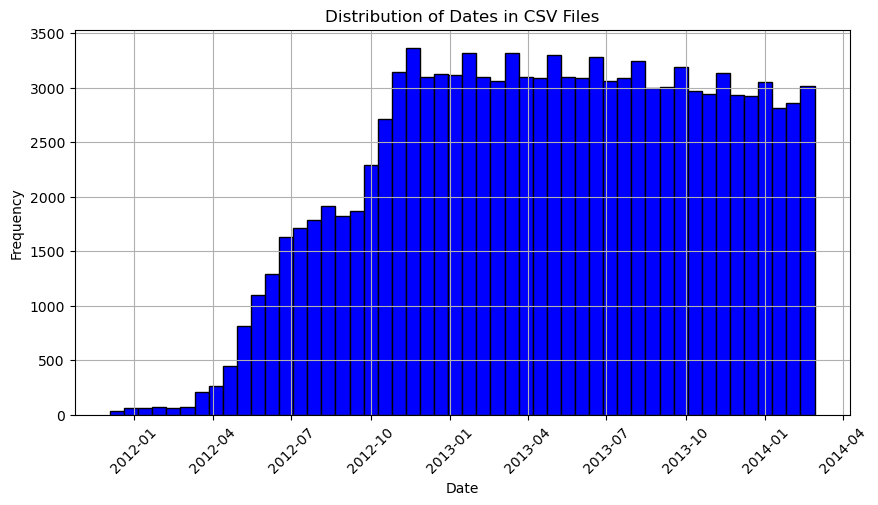

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

folder_path = Path("/Users/tomaszosuchowski/Downloads/files")  # Correct folder path
max_date = None
all_dates = []  # List to store all valid dates

for f in tqdm(folder_path.glob("*.csv")):  
    try:
        df = pd.read_csv(f, encoding="latin1", parse_dates=False, on_bad_lines="skip", sep=",", low_memory=False)

        if "day" in df.columns:
            df["day"] = pd.to_datetime(df["day"], errors="coerce", yearfirst=True)
            valid_dates = df["day"].dropna().tolist()
            all_dates.extend(valid_dates)  # Store all valid dates
            max_date = max(max_date, df["day"].max()) if max_date else df["day"].max()

    except Exception as e:
        print(f"Error reading {f}: {e}")
        continue  

# Convert dates to a Pandas Series for analysis
date_series = pd.Series(all_dates)

# Display statistics
print(f"Total valid dates collected: {len(date_series)}")
print(f"Earliest Date: {date_series.min()}")
print(f"Latest Date: {date_series.max()}")

# Save valid dates to CSV (Optional)
dates_df = pd.DataFrame(date_series, columns=["Valid Dates"])
dates_df.to_csv("valid_dates.csv", index=False)

# **Plot Histogram of Dates**
plt.figure(figsize=(10, 5))
plt.hist(date_series, bins=50, color="blue", edgecolor="black")
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Distribution of Dates in CSV Files")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [28]:
import pandas as pd

# Load the CSV file again
block_1 = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_0.csv", parse_dates=False)

# Print the first few rows to verify
print(block_1.head())

       LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.250  
1  0.159  
2  0.237  
3  0.202  
4

In [29]:
# Identify the hourly columns
hour_columns = [col for col in block_1.columns if col.startswith("hh_")]

# Reshape the DataFrame using `stack()`
reshaped_block_1 = (
    block_1.set_index(['LCLid', 'day'])[hour_columns]  # Set LCLid and day as index
    .stack()  # Stack only the hourly columns
    .reset_index()  # Reset index to flatten
    .rename(columns={"level_2": "hour_block", 0: "energy_consumption"})  # Rename columns
)

# Convert 'hour_block' to numeric offsets (hour numbers)
reshaped_block_1['offset'] = reshaped_block_1['hour_block'].str.replace("hh_", "", regex=False).astype(int)

# Print the first few rows to verify
print(reshaped_block_1.head())


       LCLid         day hour_block  energy_consumption  offset
0  MAC000002  2012-10-13       hh_0               0.263       0
1  MAC000002  2012-10-13       hh_1               0.269       1
2  MAC000002  2012-10-13       hh_2               0.275       2
3  MAC000002  2012-10-13       hh_3               0.256       3
4  MAC000002  2012-10-13       hh_4               0.211       4


In [30]:
print(block_1.columns)


Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


In [31]:
# Identify the hourly columns
hour_columns = [col for col in block_1.columns if col.startswith("hh_")]

# Reshape the DataFrame to long format
reshaped_block_1 = (
    block_1.set_index(['LCLid', 'day'])[hour_columns]
    .stack()
    .reset_index()
    .rename(columns={"level_2": "hour_block", 0: "energy_consumption"})
)

# Convert 'hour_block' to numerical hour offsets
reshaped_block_1['offset'] = reshaped_block_1['hour_block'].str.replace("hh_", "", regex=False).astype(int)

# Print the first few rows
print(reshaped_block_1.head())


       LCLid         day hour_block  energy_consumption  offset
0  MAC000002  2012-10-13       hh_0               0.263       0
1  MAC000002  2012-10-13       hh_1               0.269       1
2  MAC000002  2012-10-13       hh_2               0.275       2
3  MAC000002  2012-10-13       hh_3               0.256       3
4  MAC000002  2012-10-13       hh_4               0.211       4


In [32]:
print(reshaped_block_1.columns)


Index(['LCLid', 'day', 'hour_block', 'energy_consumption', 'offset'], dtype='object')


In [33]:
print(reshaped_block_1['hour_block'].unique())


['hh_0' 'hh_1' 'hh_2' 'hh_3' 'hh_4' 'hh_5' 'hh_6' 'hh_7' 'hh_8' 'hh_9'
 'hh_10' 'hh_11' 'hh_12' 'hh_13' 'hh_14' 'hh_15' 'hh_16' 'hh_17' 'hh_18'
 'hh_19' 'hh_20' 'hh_21' 'hh_22' 'hh_23' 'hh_24' 'hh_25' 'hh_26' 'hh_27'
 'hh_28' 'hh_29' 'hh_30' 'hh_31' 'hh_32' 'hh_33' 'hh_34' 'hh_35' 'hh_36'
 'hh_37' 'hh_38' 'hh_39' 'hh_40' 'hh_41' 'hh_42' 'hh_43' 'hh_44' 'hh_45'
 'hh_46' 'hh_47']


In [34]:
reshaped_block_1['day'] = pd.to_datetime(reshaped_block_1['day'], format="%Y-%m-%d")



In [35]:
#print(dir())  # Lists all defined variables

#print(block1_compact.head())
print(reshaped_block_1.head())  # Use the correct variable name


       LCLid        day hour_block  energy_consumption  offset
0  MAC000002 2012-10-13       hh_0               0.263       0
1  MAC000002 2012-10-13       hh_1               0.269       1
2  MAC000002 2012-10-13       hh_2               0.275       2
3  MAC000002 2012-10-13       hh_3               0.256       3
4  MAC000002 2012-10-13       hh_4               0.211       4


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ✅ Ensure 'hour_block' is numeric
reshaped_block_1["hour_block"] = pd.to_numeric(reshaped_block_1["hour_block"], errors="coerce")

# ✅ Create 'start_timestamp' and 'series_length'
reshaped_block_1["start_timestamp"] = pd.to_datetime(reshaped_block_1["day"], errors="coerce") + \
                                      pd.to_timedelta(reshaped_block_1["hour_block"] * 30, unit="m")

reshaped_block_1["series_length"] = reshaped_block_1.groupby("LCLid")["start_timestamp"].transform("count")

# ✅ Debugging: Check if there are any valid customers before selecting one
print("Unique LCLid values:", reshaped_block_1["LCLid"].unique())  # Check if there are valid customers
print("Total rows in dataset:", len(reshaped_block_1))  # Check total rows

# ✅ Fix: Ensure we have valid customers before selecting one
if reshaped_block_1["LCLid"].nunique() == 0:
    raise ValueError("❌ No valid customers found in reshaped_block_1!")

# ✅ Select a random customer
random_customer = random.choice(reshaped_block_1["LCLid"].unique())

# ✅ Extract customer data
customer_data = reshaped_block_1[reshaped_block_1["LCLid"] == random_customer]

# ✅ Ensure required columns exist before proceeding
if not customer_data["start_timestamp"].isna().all() and "series_length" in customer_data.columns:
    start_time = customer_data["start_timestamp"].values[0]
    
    if pd.isna(start_time):  # If NaT, print warning and exit
        print(f"⚠️ Warning: start_timestamp is NaT for customer {random_customer}. Skipping.")
    else:
        timestamps = pd.date_range(
            start=start_time, 
            periods=int(customer_data["series_length"].values[0]),  # Convert to integer
            freq="30min"
        )
        energy_values = np.array(customer_data["energy_consumption"].values)

        # ✅ Plot
        plt.figure(figsize=(12, 5))
        plt.plot(timestamps, energy_values, label=f"Energy Usage for {random_customer}", color="blue")
        plt.xlabel("Time")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Over Time - Customer {random_customer}")
        plt.legend()
        plt.grid(True)
        plt.show()
else:
    print(f"⚠️ Warning: Missing required data for customer {random_customer}.")


Unique LCLid values: ['MAC000002' 'MAC000246' 'MAC000450' 'MAC001074' 'MAC003223' 'MAC003239'
 'MAC003252' 'MAC003281' 'MAC003305' 'MAC003348' 'MAC003388' 'MAC003394'
 'MAC003400' 'MAC003422' 'MAC003423' 'MAC003428' 'MAC003449' 'MAC003463'
 'MAC003482' 'MAC003553' 'MAC003557' 'MAC003566' 'MAC003579' 'MAC003597'
 'MAC003613' 'MAC003646' 'MAC003656' 'MAC003668' 'MAC003680' 'MAC003686'
 'MAC003718' 'MAC003719' 'MAC003737' 'MAC003740' 'MAC003775' 'MAC003805'
 'MAC003817' 'MAC003826' 'MAC003844' 'MAC003851' 'MAC003856' 'MAC003863'
 'MAC003874' 'MAC004034' 'MAC004179' 'MAC004247' 'MAC004319' 'MAC004387'
 'MAC004431' 'MAC005492']
Total rows in dataset: 1213678
⚠️ Warning: Missing required data for customer MAC003252.


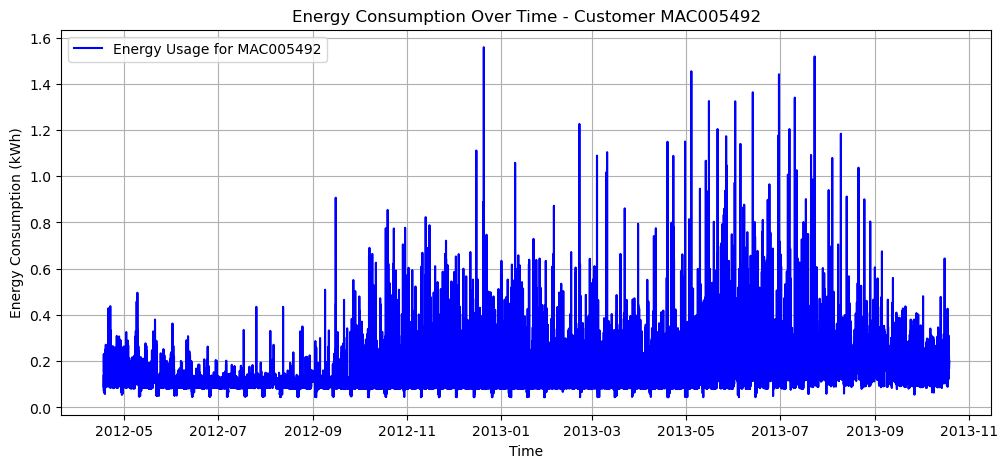

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# ✅ Reshape block_1 from wide to long format
reshaped_block_1 = block_1.melt(id_vars=["LCLid", "day"], 
                                value_vars=[col for col in block_1.columns if col.startswith("hh_")],
                                var_name="hour_block",
                                value_name="energy_consumption")

# ✅ Convert 'hour_block' from 'hh_X' to numerical hour values (0 to 47)
reshaped_block_1["hour_block"] = reshaped_block_1["hour_block"].str.extract(r"(\d+)").astype(float)

# ✅ Ensure 'hour_block' is numeric and fill missing values
reshaped_block_1["hour_block"] = pd.to_numeric(reshaped_block_1["hour_block"], errors="coerce").fillna(0)

# ✅ Create 'start_timestamp' and 'series_length'
reshaped_block_1["start_timestamp"] = pd.to_datetime(reshaped_block_1["day"], errors="coerce") + \
                                      pd.to_timedelta(reshaped_block_1["hour_block"] * 30, unit="m")

reshaped_block_1["series_length"] = reshaped_block_1.groupby("LCLid")["start_timestamp"].transform("count")

# ✅ Select a random customer
valid_customers = reshaped_block_1.dropna(subset=["start_timestamp"])
if valid_customers.empty:
    raise ValueError("❌ No valid customers found in reshaped_block_1!")

random_customer = random.choice(valid_customers["LCLid"].unique())

# ✅ Extract customer data
customer_data = reshaped_block_1[reshaped_block_1["LCLid"] == random_customer]

# ✅ Ensure required columns exist before proceeding
if not customer_data["start_timestamp"].isna().all() and "series_length" in customer_data.columns:
    start_time = customer_data["start_timestamp"].values[0]
    
    if pd.isna(start_time):  # If NaT, print warning and exit
        print(f"⚠️ Warning: start_timestamp is NaT for customer {random_customer}. Skipping.")
    else:
        timestamps = pd.date_range(
            start=start_time, 
            periods=int(customer_data["series_length"].values[0]),  # Convert to integer
            freq="30min"
        )
        energy_values = np.array(customer_data["energy_consumption"].values)

        # ✅ Plot
        plt.figure(figsize=(12, 5))
        plt.plot(timestamps, energy_values, label=f"Energy Usage for {random_customer}", color="blue")
        plt.xlabel("Time")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title(f"Energy Consumption Over Time - Customer {random_customer}")
        plt.legend()
        plt.grid(True)
        plt.show()
else:
    print(f"⚠️ Warning: Missing required data for customer {random_customer}.")


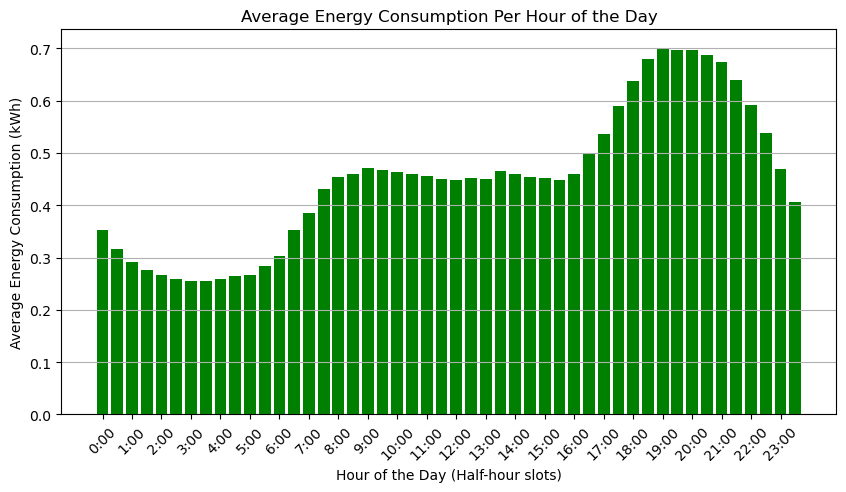

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
block_1 = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_0.csv", parse_dates=False)

# Extract only half-hourly energy consumption columns
energy_columns = [f"hh_{i}" for i in range(48)]

# ✅ Convert all energy columns to float, replacing non-numeric values with NaN
block_1[energy_columns] = block_1[energy_columns].apply(pd.to_numeric, errors="coerce")

# ✅ Initialize arrays
hourly_consumption = np.zeros(48, dtype=np.float64)  # 48 half-hour slots
counts = np.zeros(48, dtype=np.float64)

# ✅ Iterate through the DataFrame
for _, row in block_1.iterrows():
    # ✅ Convert row values to float64
    energy_values = row[energy_columns].astype(np.float64).values
    energy_values = np.nan_to_num(energy_values)  # Replace NaNs with 0
    
    hourly_consumption += energy_values  # Sum up energy consumption
    counts += ~np.isnan(row[energy_columns].astype(np.float64).values)  # ✅ Convert row to float before checking NaN

# ✅ Compute the average energy consumption per half-hour slot
hourly_avg = np.divide(hourly_consumption, counts, out=np.zeros_like(hourly_consumption), where=counts != 0)

# ✅ Plot
plt.figure(figsize=(10, 5))
plt.bar(range(48), hourly_avg, color="green")
plt.xlabel("Hour of the Day (Half-hour slots)")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption Per Hour of the Day")
plt.xticks(range(0, 48, 2), labels=[f"{h//2}:30" if h % 2 else f"{h//2}:00" for h in range(0, 48, 2)], rotation=45)
plt.grid(axis="y")
plt.show()



In [40]:
print(block_1.columns)


Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


Available columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


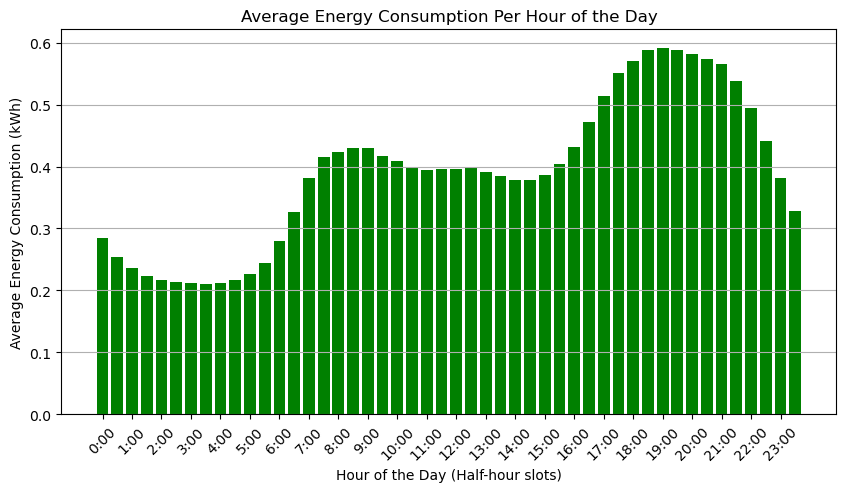

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ✅ Load CSV file
block1_compact = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv", parse_dates=False)

# ✅ Check available columns
print("Available columns:", block1_compact.columns)

# ✅ Extract the correct energy consumption columns (hh_0 to hh_47)
energy_columns = [f"hh_{i}" for i in range(48)]  

# ✅ Convert energy values to numeric (handle non-numeric values as NaN)
block1_compact[energy_columns] = block1_compact[energy_columns].apply(pd.to_numeric, errors="coerce")

# ✅ Compute the average energy consumption per half-hour slot
hourly_avg = block1_compact[energy_columns].mean()

# ✅ Plot the results
plt.figure(figsize=(10, 5))
plt.bar(range(48), hourly_avg, color="green")
plt.xlabel("Hour of the Day (Half-hour slots)")
plt.ylabel("Average Energy Consumption (kWh)")
plt.title("Average Energy Consumption Per Hour of the Day")
plt.xticks(range(0, 48, 2), labels=[f"{h//2}:30" if h % 2 else f"{h//2}:00" for h in range(0, 48, 2)], rotation=45)
plt.grid(axis="y")
plt.show()



Available columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


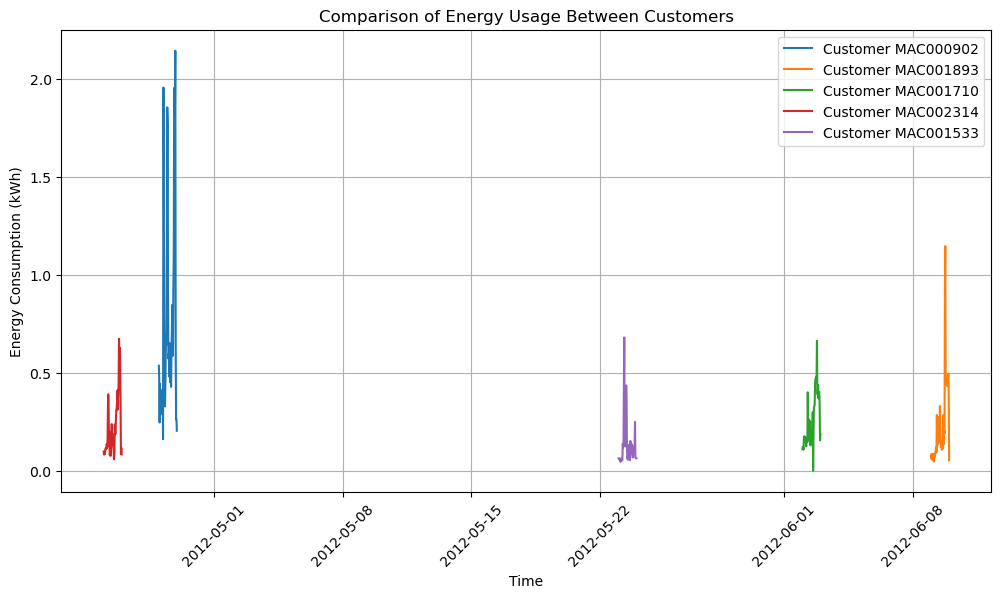

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ✅ Load data
block1_compact = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv", parse_dates=["day"])

# ✅ Check available columns
print("Available columns:", block1_compact.columns)

# ✅ Select 5 random customers
random_customers = random.sample(list(block1_compact["LCLid"].unique()), 5)

plt.figure(figsize=(12, 6))

for customer in random_customers:
    # ✅ Get customer data
    customer_data = block1_compact[block1_compact["LCLid"] == customer]

    # ✅ Generate timestamps for each half-hour slot of the day
    timestamps = pd.date_range(start=customer_data["day"].values[0], periods=48, freq="30min")

    # ✅ Extract energy consumption values
    energy_values = customer_data.iloc[0, 2:].values.astype(float)  # Select hh_0 to hh_47 columns

    # ✅ Plot each customer's energy usage
    plt.plot(timestamps, energy_values, label=f"Customer {customer}")

plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Comparison of Energy Usage Between Customers")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


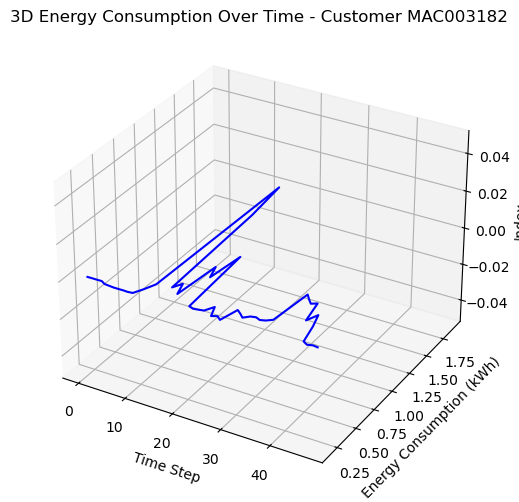

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

# ✅ Load data
block1_compact = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv", parse_dates=["day"])

# ✅ Select a random customer
random_customer = random.choice(block1_compact["LCLid"].unique())

# ✅ Extract customer data
customer_data = block1_compact[block1_compact["LCLid"] == random_customer]

# ✅ Generate timestamps assuming each row represents one full day
timestamps = pd.date_range(start=customer_data["day"].values[0], periods=48, freq="30min")

# ✅ Extract energy consumption values (hh_0 to hh_47)
energy_values = customer_data.iloc[0, 2:].values.astype(float)  # Convert to float

# ✅ Convert timestamps to numerical values for 3D plotting
time_numeric = np.arange(len(timestamps))

# ✅ Create 3D plot
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d")

ax.plot(time_numeric, energy_values, zs=0, zdir="z", label="Energy Consumption", color="blue")

ax.set_xlabel("Time Step")
ax.set_ylabel("Energy Consumption (kWh)")
ax.set_zlabel("Index")
ax.set_title(f"3D Energy Consumption Over Time - Customer {random_customer}")

plt.show()


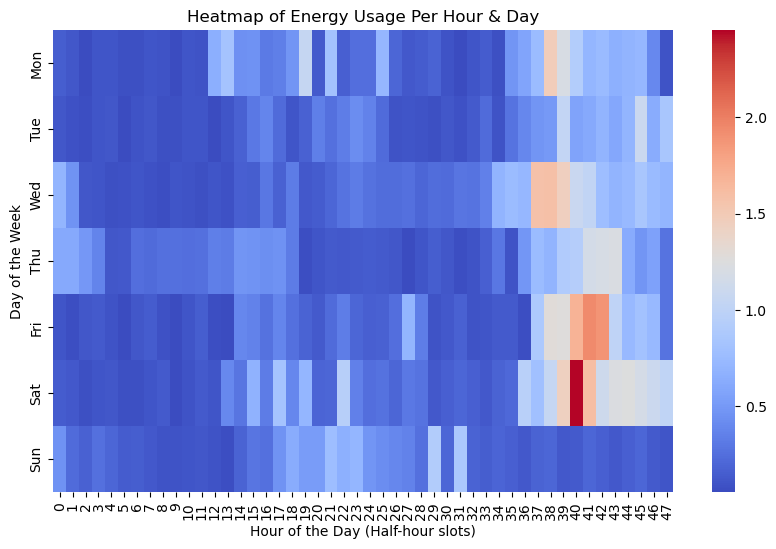

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load dataset
block1_compact = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv", parse_dates=["day"])

# ✅ Define the correct energy columns
energy_columns = [f"hh_{i}" for i in range(48)]

# ✅ Convert energy values to numeric (if necessary)
block1_compact[energy_columns] = block1_compact[energy_columns].apply(pd.to_numeric, errors="coerce")

# ✅ Create a matrix of hourly energy consumption averages (7 days × 48 half-hour slots)
hourly_avg_matrix = np.zeros((7, 48))

# ✅ Iterate over the first 7 rows (customers or days)
for i, row in block1_compact.iloc[:7].iterrows():
    energy_values = row[energy_columns].values.astype(float)  # Convert to float
    hourly_avg_matrix[i, :] = energy_values  # Store in matrix

# ✅ Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_avg_matrix, cmap="coolwarm", xticklabels=range(48), yticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Hour of the Day (Half-hour slots)")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Energy Usage Per Hour & Day")
plt.show()


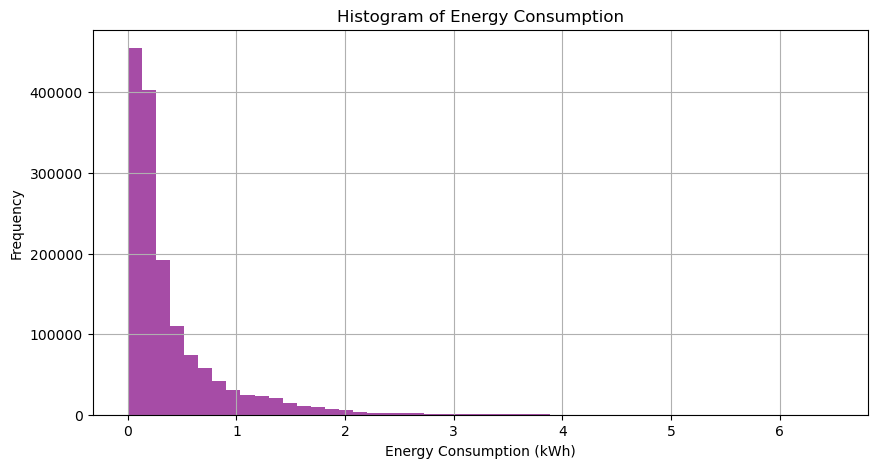

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Define energy consumption columns
energy_columns = [f"hh_{i}" for i in range(48)]

# ✅ Load dataset (if not already loaded)
block1_compact = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv")

# ✅ Convert values to float (in case of strings or errors)
block1_compact[energy_columns] = block1_compact[energy_columns].apply(pd.to_numeric, errors="coerce")

# ✅ Flatten the energy consumption data into a single array
all_energy_values = block1_compact[energy_columns].values.flatten()

# ✅ Remove NaN values (if any)
all_energy_values = all_energy_values[~np.isnan(all_energy_values)]

# ✅ Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(all_energy_values, bins=50, color="purple", alpha=0.7)

plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Histogram of Energy Consumption")
plt.grid(True)
plt.show()


# Compact Form

In [46]:
def preprocess_compact(x):
    start_date = x['day'].min()
    name = x['LCLid'].unique()[0]
    ### Fill missing dates with NaN ###
    # Create a date range from  min to max
    dr = pd.date_range(start=x['day'].min(), end=max_date, freq="1D")
    # Add hh_0 to hh_47 to columns and with some unstack magic recreating date-hh_x combinations
    dr = pd.DataFrame(columns=[f"hh_{i}" for i in range(48)], index=dr).unstack().reset_index()
    # renaming the columns
    dr.columns = ["hour_block", "day", "_"]
    # left merging the dataframe to the standard dataframe
    # now the missing values will be left as NaN
    dr = dr.merge(x, on=['hour_block','day'], how='left')
    # sorting the rows
    dr.sort_values(['day',"offset"], inplace=True)
    # extracting the timeseries array
    ts = dr['energy_consumption'].values
    len_ts = len(ts)
    return start_date, name, ts, len_ts

In [47]:
print("block_1 columns:", block_1.columns)




block_1 columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


In [48]:
block_1_melted = block_1.melt(id_vars=["LCLid", "day"], var_name="hour_block", value_name="energy_consumption")


In [49]:
print(block_1_melted.head())


       LCLid         day hour_block  energy_consumption
0  MAC000002  2012-10-13       hh_0               0.263
1  MAC000002  2012-10-14       hh_0               0.262
2  MAC000002  2012-10-15       hh_0               0.192
3  MAC000002  2012-10-16       hh_0               0.237
4  MAC000002  2012-10-17       hh_0               0.157


In [50]:
block_1_melted["hour_block"] = block_1_melted["hour_block"].astype(str).str.replace("hh_", "").astype(int)



In [51]:
print(block_1_melted.head())


       LCLid         day  hour_block  energy_consumption
0  MAC000002  2012-10-13           0               0.263
1  MAC000002  2012-10-14           0               0.262
2  MAC000002  2012-10-15           0               0.192
3  MAC000002  2012-10-16           0               0.237
4  MAC000002  2012-10-17           0               0.157


In [52]:
block_1_melted["hour_block"] = block_1_melted["hour_block"].astype(str)


In [53]:
def load_process_block_compact(block_df, freq="30min", ts_identifier="series_name", value_name="series_value"):
    grps = block_df.groupby('LCLid')
    all_series = []
    all_start_dates = []
    all_names = []
    all_data = {}
    all_len = []

    for idx, df in tqdm(grps, leave=False):
        start_date, name, ts, len_ts = preprocess_compact(df)
        all_series.append(ts)
        all_start_dates.append(start_date)
        all_names.append(name)
        all_len.append(len_ts)

    all_data[ts_identifier] = all_names
    all_data['start_timestamp'] = all_start_dates
    all_data['frequency'] = freq
    all_data[value_name] = all_series
    all_data['series_length'] = all_len

    return pd.DataFrame(all_data)


In [54]:
def preprocess_compact(x):
    # Creating a copy of the input DataFrame
    dr = x.copy()

    # Sorting the rows by 'day'
    dr.sort_values(['day'], inplace=True)

    # Extracting the timeseries array
    ts = dr['energy_consumption'].values
    len_ts = len(ts)

    # Returning extracted information
    return dr['day'].min(), x['LCLid'].iloc[0], ts, len_ts


In [55]:
block1_compact = load_process_block_compact(block_1_melted, freq="30min", ts_identifier="LCLid", value_name="energy_consumption")



In [56]:
block1_compact.head()

,LCLid,start_timestamp,frequency,energy_consumption,series_length
0,MAC000002,2012-10-13,30min,"[0.263, 0.161, 0.134, 0.235, 0.124, 0.136, 0.1...",23904
1,MAC000246,2011-12-04,30min,"[0.175, 0.634, 1.219, 0.821, 0.233, 0.144, 0.1...",39072
2,MAC000450,2012-03-23,30min,"[1.337, 1.012, 0.971, 0.826, 0.842000000000000...",19680
3,MAC001074,2012-05-09,30min,"[0.18, 1.86, 0.089, 1.523, 1.0, 0.39, 0.086, 0...",10656
4,MAC003223,2012-09-18,30min,"[0.076, 0.077, 0.392, 0.083, 0.252, 0.051, 0.0...",25248


In [57]:
display(block1_compact.memory_usage(deep=True))
print(f"Total: {block1_compact.memory_usage(deep=True).sum()/1024**2} MB")

Index                  132
LCLid                 2900
start_timestamp       2950
frequency             2700
energy_consumption    6000
series_length          400
dtype: int64

Total: 0.014383316040039062 MB


# Expanded Form

In [58]:
def preprocess_expanded(x):
    start_date = x['day'].min()

    ### Fill missing dates with NaN ###
    dr = pd.date_range(start=start_date, end=x['day'].max(), freq="1D")
    dr = pd.MultiIndex.from_product([dr, range(48)], names=["day", "hour_block"]).to_frame(index=False)

    # Format 'hour_block' correctly
    dr["hour_block"] = dr["hour_block"].apply(lambda x: f"hh_{x}")

    # Debugging prints
    print("Columns in x before melting:", x.columns)

    # Reshape x: Convert hh_0, hh_1, ..., hh_47 into a long format with 'hour_block'
    x_melted = x.melt(id_vars=['LCLid', 'day'], var_name='hour_block', value_name='energy_consumption')

    # Ensure 'hour_block' is formatted correctly
    x_melted['hour_block'] = x_melted['hour_block'].astype(str)

    # Debugging print after melting
    print("Columns in x after melting:", x_melted.columns)

    # Merge with the corrected format
    dr = dr.merge(x_melted, on=['hour_block', 'day'], how='left')

    return dr


In [59]:
print("Shape of block_1 DataFrame:", block_1.shape)
print(block_1.head())

Shape of block_1 DataFrame: (25286, 50)
       LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000002  2012-10-13  0.263  0.269  0.275  0.256  0.211  0.136  0.161   
1  MAC000002  2012-10-14  0.262  0.166  0.226  0.088  0.126  0.082  0.123   
2  MAC000002  2012-10-15  0.192  0.097  0.141  0.083  0.132  0.070  0.130   
3  MAC000002  2012-10-16  0.237  0.237  0.193  0.118  0.098  0.107  0.094   
4  MAC000002  2012-10-17  0.157  0.211  0.155  0.169  0.101  0.117  0.084   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.119  ...  0.918  0.278  0.267  0.239  0.230  0.233  0.235  0.188  0.259   
1  0.083  ...  1.075  0.956  0.821  0.745  0.712  0.511  0.231  0.210  0.278   
2  0.074  ...  1.164  0.249  0.225  0.258  0.260  0.334  0.299  0.236  0.241   
3  0.109  ...  0.966  0.172  0.192  0.228  0.203  0.211  0.188  0.213  0.157   
4  0.118  ...  0.223  0.075  0.230  0.208  0.265  0.377  0.327  0.277  0.288   

   hh_47  
0  0.

In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def preprocess_expanded(x):
    """
    Preprocesses a block of data by melting it into a long format and merging with a time reference DataFrame.
    """
    print("Initial shape of x:", x.shape)  # Debugging print

    # Convert 'day' column to datetime format
    x["day"] = pd.to_datetime(x["day"], errors="coerce")

    # Ensure 'day' conversion was successful
    if x["day"].isnull().any():
        print("Warning: Some 'day' values could not be converted to datetime.")

    # Melt the DataFrame to long format (Convert hh_0 to hh_47 into a single column)
    x_melted = x.melt(id_vars=["LCLid", "day"], var_name="hour_block", value_name="energy_usage")

    # Ensure 'hour_block' column is properly formatted
    x_melted["hour_block"] = x_melted["hour_block"].str.replace("hh_", "").astype(int)

    print("Columns in x after melting:", x_melted.columns)  # Debugging print

    # Create a reference DataFrame for timestamps
    dr = pd.DataFrame({"hour_block": range(48)})  # 48 half-hour slots in a day
    dr["day"] = x["day"].iloc[0]  # Use the first available day value
    dr["day"] = pd.to_datetime(dr["day"])  # Ensure datetime type

    # ✅ Merge the processed data with the reference time DataFrame
    dr = dr.merge(x_melted, on=['hour_block', 'day'], how='left')

    return dr

def load_process_block_expanded(block_df, freq="30min"):
    """
    Processes a DataFrame by grouping it by 'LCLid' and expanding its time series.
    """
    print("Initial shape of block_df:", block_df.shape)  # Print shape from the start

    grps = block_df.groupby('LCLid')
    all_series = []

    for idx, df in tqdm(grps, leave=False):
        print(f"Processing LCLid: {idx} with shape: {df.shape}")
        ts = preprocess_expanded(df)
        all_series.append(ts)

    if not all_series:
        print("No series generated from groups.")
        return pd.DataFrame()  # Return empty DataFrame if no groups processed

    block_df = pd.concat(all_series, ignore_index=True)

    # Debugging the shape of block_df after concatenation
    print("Shape of concatenated DataFrame:", block_df.shape)

    if block_df.empty:
        print("Concatenated DataFrame is empty.")
        return block_df  # Return empty DataFrame

    # ✅ Recreate Offset for time alignment
    block_df['offset'] = block_df['hour_block']

    # ✅ Creating a timestamp column
    block_df['timestamp'] = block_df['day'] + pd.to_timedelta(block_df['offset'] * 30, unit='m')

    print("Number of null timestamps:", block_df['timestamp'].isnull().sum())

    block_df['frequency'] = freq
    block_df.sort_values(["LCLid", "timestamp"], inplace=True)

    # ✅ Drop unnecessary columns if they exist
    cols_to_drop = ["_", "hour_block", "offset", "day"]
    existing_cols_to_drop = [col for col in cols_to_drop if col in block_df.columns]
    block_df.drop(columns=existing_cols_to_drop, inplace=True)

    print("Final shape of block_df before return:", block_df.shape)  # Print final shape
    return block_df

# ✅ Call the function and check the returned DataFrame
block1_expanded = load_process_block_expanded(block_1, freq="30min")
print("Resulting DataFrame shape:", block1_expanded.shape)
print(block1_expanded.head())


Initial shape of block_df: (25286, 50)


  2%|▉                                           | 1/50 [00:00<00:07,  6.77it/s]

Processing LCLid: MAC000002 with shape: (498, 50)
Initial shape of x: (498, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000246 with shape: (814, 50)
Initial shape of x: (814, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000450 with shape: (410, 50)
Initial shape of x: (410, 50)


 10%|████▍                                       | 5/50 [00:00<00:03, 13.80it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001074 with shape: (222, 50)
Initial shape of x: (222, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003223 with shape: (526, 50)
Initial shape of x: (526, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003239 with shape: (526, 50)
Initial shape of x: (526, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003252 with shape: (513, 50)
Initial shape of x: (513, 50)


 20%|████████▌                                  | 10/50 [00:00<00:02, 18.77it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003281 with shape: (519, 50)
Initial shape of x: (519, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003305 with shape: (519, 50)
Initial shape of x: (519, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003348 with shape: (440, 50)
Initial shape of x: (440, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003388 with shape: (516, 50)
Initial shape of x: (516, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003394 with shape: (510, 50)
Initial shape of x: (510, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')


 28%|████████████                               | 14/50 [00:00<00:01, 18.47it/s]

Processing LCLid: MAC003400 with shape: (511, 50)
Initial shape of x: (511, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003422 with shape: (494, 50)
Initial shape of x: (494, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003423 with shape: (503, 50)
Initial shape of x: (503, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003428 with shape: (508, 50)
Initial shape of x: (508, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')


 36%|███████████████▍                           | 18/50 [00:01<00:01, 18.65it/s]

Processing LCLid: MAC003449 with shape: (507, 50)
Initial shape of x: (507, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003463 with shape: (311, 50)
Initial shape of x: (311, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003482 with shape: (509, 50)
Initial shape of x: (509, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003553 with shape: (503, 50)
Initial shape of x: (503, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003557 with shape: (405, 50)
Initial shape of x: (405, 50)


 46%|███████████████████▊                       | 23/50 [00:01<00:01, 19.17it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003566 with shape: (503, 50)
Initial shape of x: (503, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003579 with shape: (505, 50)
Initial shape of x: (505, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003597 with shape: (501, 50)
Initial shape of x: (501, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003613 with shape: (500, 50)
Initial shape of x: (500, 50)


 50%|█████████████████████▌                     | 25/50 [00:01<00:02,  9.77it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003646 with shape: (502, 50)
Initial shape of x: (502, 50)


 54%|███████████████████████▏                   | 27/50 [00:02<00:02,  9.04it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003656 with shape: (500, 50)
Initial shape of x: (500, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003668 with shape: (499, 50)
Initial shape of x: (499, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003680 with shape: (493, 50)
Initial shape of x: (493, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003686 with shape: (497, 50)
Initial shape of x: (497, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')


 64%|███████████████████████████▌               | 32/50 [00:02<00:01, 13.00it/s]

Processing LCLid: MAC003718 with shape: (361, 50)
Initial shape of x: (361, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003719 with shape: (497, 50)
Initial shape of x: (497, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003737 with shape: (496, 50)
Initial shape of x: (496, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003740 with shape: (495, 50)
Initial shape of x: (495, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003775 with shape: (448, 50)
Initial shape of x: (448, 50)


 70%|██████████████████████████████             | 35/50 [00:02<00:00, 15.84it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003805 with shape: (492, 50)
Initial shape of x: (492, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003817 with shape: (493, 50)
Initial shape of x: (493, 50)


 82%|███████████████████████████████████▎       | 41/50 [00:02<00:00, 14.76it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003826 with shape: (491, 50)
Initial shape of x: (491, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003844 with shape: (488, 50)
Initial shape of x: (488, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003851 with shape: (489, 50)
Initial shape of x: (489, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003856 with shape: (484, 50)
Initial shape of x: (484, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003863 with shape: (487, 50)
Initial shape of x: (487, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing L

 94%|████████████████████████████████████████▍  | 47/50 [00:03<00:00, 19.37it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004179 with shape: (646, 50)
Initial shape of x: (646, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004247 with shape: (637, 50)
Initial shape of x: (637, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004319 with shape: (642, 50)
Initial shape of x: (642, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004387 with shape: (708, 50)
Initial shape of x: (708, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004431 with shape: (697, 50)
Initial shape of x: (697, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing L

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Shape of concatenated DataFrame: (2400, 4)
Number of null timestamps: 0
Final shape of block_df before return: (2400, 4)
Resulting DataFrame shape: (2400, 4)
       LCLid  energy_usage           timestamp frequency
0  MAC000002         0.263 2012-10-13 00:00:00     30min
1  MAC000002         0.269 2012-10-13 00:30:00     30min
2  MAC000002         0.275 2012-10-13 01:00:00     30min
3  MAC000002         0.256 2012-10-13 01:30:00     30min
4  MAC000002         0.211 2012-10-13 02:00:00     30min


In [61]:
display(block1_expanded.memory_usage())
print(f"Total: {block1_expanded.memory_usage().sum()/1024**2} MB")

Index             132
LCLid           19200
energy_usage    19200
timestamp       19200
frequency       19200
dtype: int64

Total: 0.07336807250976562 MB


In [62]:
del block1_expanded, block_1, block1_compact

In [63]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from pathlib import Path

def load_process_block_compact(block_df, freq="30min", ts_identifier="LCLid", value_name="energy_consumption"):
    """
    Processes a DataFrame by formatting timestamps and ensuring data consistency.
    """
    print("Initial shape of block_df:", block_df.shape)

    # ✅ Ensure the 'day' column is in datetime format
    block_df['day'] = pd.to_datetime(block_df['day'], errors='coerce', yearfirst=True)

    # ✅ Check for and remove invalid 'hour_block' values
    print("Unique values in hour_block before filtering:", block_df["hour_block"].unique())
    block_df = block_df[block_df["hour_block"].str.startswith("hh_")]
    print("Unique values in hour_block after filtering:", block_df["hour_block"].unique())

    # ✅ Convert 'hour_block' to integer safely
    block_df['offset'] = block_df['hour_block'].str.replace("hh_", "").astype(int)

    # ✅ Create timestamp column
    block_df['timestamp'] = block_df['day'] + pd.to_timedelta(block_df['offset'] * 30, unit='m')

    print("Number of null timestamps:", block_df['timestamp'].isnull().sum())

    block_df['frequency'] = freq
    block_df.sort_values([ts_identifier, "timestamp"], inplace=True)

    # ✅ Drop unnecessary columns
    cols_to_drop = ["hour_block", "offset", "day"]
    block_df.drop(columns=[col for col in cols_to_drop if col in block_df.columns], inplace=True)

    print("Final shape of block_df before return:", block_df.shape)
    return block_df

# ✅ Process multiple block CSV files
block_df_l = []
block_data_path = Path("data/london_smart_meters/hhblock_dataset")  # Change to correct path

for file in tqdm(sorted(block_data_path.glob("*.csv")), desc="Processing Blocks.."):
    block_df = pd.read_csv(file, parse_dates=False)

    # ✅ Debugging: Check available columns
    print(f"\nProcessing file: {file.name}")
    print("Available columns:", block_df.columns)

    # ✅ Ensure 'day' column exists, otherwise skip file
    if "day" not in block_df.columns:
        print(f"Skipping {file.name}: 'day' column missing.")
        continue

    # ✅ Convert 'day' to datetime
    block_df['day'] = pd.to_datetime(block_df['day'], errors='coerce', yearfirst=True)

    # ✅ Keep data from 2012-01-01 onwards
    block_df = block_df.loc[block_df['day'] >= "2012-01-01"]

    # ✅ Reshape the DataFrame into long format
    block_df = block_df.set_index(['LCLid', "day"]).stack().reset_index().rename(columns={"level_2": "hour_block", 0: "energy_consumption"})

    # ✅ Process the block and store in list
    block_df_l.append(load_process_block_compact(block_df, freq="30min", ts_identifier="LCLid", value_name="energy_consumption"))

# ✅ Combine all processed blocks into a single DataFrame
final_block_df = pd.concat(block_df_l, ignore_index=True)
print("Final combined DataFrame shape:", final_block_df.shape)
print(final_block_df.head())


Processing Blocks..:   0%|                                | 0/7 [00:00<?, ?it/s]


Processing file: block_0.csv
Available columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Initial shape of block_df: (1212334, 4)
Unique values in hour_block before filtering: ['hh_0' 'hh_1' 'hh_2' 'hh_3' 'hh_4' 'hh_5' 'hh_6' 'hh_7' 'hh_8' 'hh_9'
 'hh_10' 'hh_11' 'hh_12' 'hh_13' 'hh_14' 'hh_15' 'hh_16' 'hh_17' 'hh_18'
 'hh_19' 'hh_20' 'hh_21' 'hh_22' 'hh_23' 'hh_24' 'hh_25' 'hh_26' 'hh_27'
 'hh_28' 'hh_29' 'hh_30' 'hh_31' 'hh_32' 'hh_33' 'hh_34' 'hh_35' 'hh_36'
 'hh_37' 'hh_38' 'hh_39' 'hh_40' 'hh_41' 'hh_42' 'hh_43' 'hh_44' 

Processing Blocks..:  14%|███▍                    | 1/7 [00:04<00:24,  4.02s/it]

Final shape of block_df before return: (1212334, 4)

Processing file: block_1.csv
Available columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')
Initial shape of block_df: (1499134, 4)
Unique values in hour_block before filtering: ['hh_0' 'hh_1' 'hh_2' 'hh_3' 'hh_4' 'hh_5' 'hh_6' 'hh_7' 'hh_8' 'hh_9'
 'hh_10' 'hh_11' 'hh_12' 'hh_13' 'hh_14' 'hh_15' 'hh_16' 'hh_17' 'hh_18'
 'hh_19' 'hh_20' 'hh_21' 'hh_22' 'hh_23' 'hh_24' 'hh_25' 'hh_26' 'hh_27'
 'hh_28' 'hh_29' 'hh_30' 'hh_31' 'hh_32' 'hh_33' 'hh_34' 'hh_35' 'hh_36'
 'hh_37' 'hh_

Processing Blocks..:  29%|██████▊                 | 2/7 [00:06<00:16,  3.28s/it]

Final shape of block_df before return: (1499134, 4)

Processing file: informations_households.csv
Available columns: Index(['LCLid', 'stdorToU', 'Acorn', 'Acorn_grouped', 'file'], dtype='object')
Skipping informations_households.csv: 'day' column missing.


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:43: DtypeWarning: Columns (50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  block_df = pd.read_csv(file, parse_dates=False)



Processing file: processed_smart_meters.csv
Available columns: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47', 'stdorToU_x', 'Acorn_x', 'Acorn_grouped_x', 'file_x',
       'stdorToU_y', 'Acorn_y', 'Acorn_grouped_y', 'file_y'],
      dtype='object')
Initial shape of block_df: (2937432, 4)
Unique values in hour_block before filtering: ['hh_0' 'hh_1' 'hh_2' 'hh_3' 'hh_4' 'hh_5' 'hh_6' 'hh_7' 'hh_8' 'hh_9'
 'hh_10' 'hh_11' 'hh_12' 'hh_13' 'hh_14' 'hh_15' 'hh_16' 'hh_17' 'hh_18'
 'hh_19' 'hh_20' 'hh_21' 'hh_22' 'hh_23' 'hh_24' 'hh_25' 'hh_26' 'hh_27'
 'hh_28'

/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df['offset'] = block_df['hour_block'].str.replace("hh_", "").astype(int)
/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df['timestamp'] = block_df['day'] + pd.to_timedelta(block_df['offset'] * 30, unit='m')
/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:28:

Number of null timestamps: 0


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df.sort_values([ts_identifier, "timestamp"], inplace=True)
/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/1193331375.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_df.drop(columns=[col for col in cols_to_drop if col in block_df.columns], inplace=True)
Processing Blocks..: 100%|████████████████████████| 7/7 [00:14<00:00,  2.08s/it]

Final shape of block_df before return: (2711468, 4)

Processing file: uk_bank_holidays.csv
Available columns: Index(['Bank holidays', 'Type'], dtype='object')
Skipping uk_bank_holidays.csv: 'day' column missing.

Processing file: weather_daily_darksky.csv
Available columns: Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')
Skipping weather_daily_darksky.csv: 'day' c

Final combined DataFrame shape: (5422936, 4)
       LCLid energy_consumption           timestamp frequency
0  MAC000002              0.263 2012-10-13 00:00:00     30min
1  MAC000002              0.269 2012-10-13 00:30:00     30min
2  MAC000002              0.275 2012-10-13 01:00:00     30min
3  MAC000002              0.256 2012-10-13 01:30:00     30min
4  MAC000002              0.211 2012-10-13 02:00:00     30min


In [64]:
def load_process_block_expanded(block_df, freq="30min"):
    print("Initial shape of block_df:", block_df.shape)
    
    block_df_l = []  # Define block_df_l as an empty list here

    grps = block_df.groupby('LCLid')
    
    for idx, df in tqdm(grps, leave=False):
        print(f"Processing LCLid: {idx} with shape: {df.shape}")
        ts = preprocess_expanded(df)
        block_df_l.append(ts)  # Store each processed DataFrame in block_df_l

    # Concatenate all DataFrames in block_df_l afterwards
    hhblock_df = pd.concat(block_df_l)
    
    return hhblock_df  


In [65]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# ✅ Load the dataset before using it
block_1 = pd.read_csv("data/london_smart_meters/hhblock_dataset/block_1.csv")

# ✅ Check if the dataset is loaded correctly
print("Loaded block_1 with shape:", block_1.shape)
print(block_1.head())

def load_process_block_expanded(block_df, freq="30min"):
    print("Initial shape of block_df:", block_df.shape)
    
    block_df_l = []  # ✅ Define block_df_l as an empty list

    grps = block_df.groupby('LCLid')
    
    for idx, df in tqdm(grps, leave=False):
        print(f"Processing LCLid: {idx} with shape: {df.shape}")
        ts = preprocess_expanded(df)  # Ensure preprocess_expanded() is defined
        block_df_l.append(ts)  # Store each processed DataFrame in block_df_l

    # ✅ Concatenate all DataFrames in block_df_l
    hhblock_df = pd.concat(block_df_l, ignore_index=True)

    print("Final shape of hhblock_df:", hhblock_df.shape)
    
    return hhblock_df  

# ✅ Call the function and store the result
hhblock_df = load_process_block_expanded(block_1, freq="30min")

# ✅ Check memory usage AFTER defining hhblock_df
display(hhblock_df.memory_usage(deep=True))
print(f"Total Memory Usage: {hhblock_df.memory_usage(deep=True).sum()/1024**2:.2f} MB")


Loaded block_1 with shape: (31243, 50)
       LCLid         day   hh_0   hh_1   hh_2   hh_3   hh_4   hh_5   hh_6  \
0  MAC000323  2012-03-07  0.150  0.114  0.054  0.107  0.107  0.078  0.082   
1  MAC000323  2012-03-08  0.111  0.088  0.066  0.105  0.113  0.059  0.093   
2  MAC000323  2012-03-09  0.699  0.462  0.117  0.108  0.081  0.086  0.102   
3  MAC000323  2012-03-10  0.614  0.608  0.488  0.371  0.111  0.128  0.245   
4  MAC000323  2012-03-11  0.106  0.064  0.114  0.138  0.097  0.062  0.113   

    hh_7  ...  hh_38  hh_39  hh_40  hh_41  hh_42  hh_43  hh_44  hh_45  hh_46  \
0  0.105  ...  1.475  1.199  0.925  0.701  0.744  0.655  0.686  0.711  0.397   
1  0.112  ...  0.496  1.032  0.564  0.608  0.691  0.596  0.700  1.086  0.630   
2  0.090  ...  1.587  1.445  1.081  1.022  0.772  0.684  0.731  0.849  0.745   
3  0.226  ...  0.691  0.902  0.933  1.166  1.189  1.222  0.619  0.472  0.555   
4  0.147  ...  1.286  1.272  1.694  1.940  1.884  1.010  0.731  0.812  0.732   

   hh_47  
0  0.0

  0%|                                                    | 0/50 [00:00<?, ?it/s]

Processing LCLid: MAC000323 with shape: (722, 50)
Initial shape of x: (722, 50)


  6%|██▋                                         | 3/50 [00:00<00:05,  9.24it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000379 with shape: (496, 50)
Initial shape of x: (496, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000386 with shape: (710, 50)
Initial shape of x: (710, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000535 with shape: (678, 50)
Initial shape of x: (678, 50)


 16%|███████                                     | 8/50 [00:00<00:02, 15.29it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000557 with shape: (667, 50)
Initial shape of x: (667, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000569 with shape: (674, 50)
Initial shape of x: (674, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000713 with shape: (670, 50)
Initial shape of x: (670, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000768 with shape: (670, 50)
Initial shape of x: (670, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000778 with shape: (675, 50)
Initial shape of x: (675, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing L

 20%|████████▌                                  | 10/50 [00:00<00:04,  9.79it/s]

Processing LCLid: MAC000850 with shape: (658, 50)
Initial shape of x: (658, 50)


 30%|████████████▉                              | 15/50 [00:01<00:03,  9.10it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000886 with shape: (662, 50)
Initial shape of x: (662, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000902 with shape: (665, 50)
Initial shape of x: (665, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000948 with shape: (660, 50)
Initial shape of x: (660, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC000974 with shape: (658, 50)
Initial shape of x: (658, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001145 with shape: (645, 50)
Initial shape of x: (645, 50)


 40%|█████████████████▏                         | 20/50 [00:01<00:02, 13.22it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001239 with shape: (644, 50)
Initial shape of x: (644, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001251 with shape: (647, 50)
Initial shape of x: (647, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001271 with shape: (649, 50)
Initial shape of x: (649, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001510 with shape: (643, 50)
Initial shape of x: (643, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001528 with shape: (640, 50)
Initial shape of x: (640, 50)


 44%|██████████████████▉                        | 22/50 [00:02<00:02, 12.05it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001533 with shape: (640, 50)
Initial shape of x: (640, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001628 with shape: (636, 50)
Initial shape of x: (636, 50)


 48%|████████████████████▋                      | 24/50 [00:02<00:02,  9.84it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001689 with shape: (632, 50)
Initial shape of x: (632, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001710 with shape: (633, 50)
Initial shape of x: (633, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001734 with shape: (633, 50)
Initial shape of x: (633, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001776 with shape: (622, 50)
Initial shape of x: (622, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')


 58%|████████████████████████▉                  | 29/50 [00:02<00:01, 14.16it/s]

Processing LCLid: MAC001843 with shape: (578, 50)
Initial shape of x: (578, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001893 with shape: (621, 50)
Initial shape of x: (621, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC001989 with shape: (612, 50)
Initial shape of x: (612, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002025 with shape: (618, 50)
Initial shape of x: (618, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002068 with shape: (555, 50)
Initial shape of x: (555, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002150 with shape: (615, 50)
Initial shape of x: (615, 50)


 72%|██████████████████████████████▉            | 36/50 [00:02<00:00, 19.16it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002249 with shape: (656, 50)
Initial shape of x: (656, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002314 with shape: (662, 50)
Initial shape of x: (662, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002562 with shape: (594, 50)
Initial shape of x: (594, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002563 with shape: (597, 50)
Initial shape of x: (597, 50)


 78%|█████████████████████████████████▌         | 39/50 [00:03<00:00, 20.03it/s]

Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002601 with shape: (592, 50)
Initial shape of x: (592, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002613 with shape: (258, 50)
Initial shape of x: (258, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002628 with shape: (656, 50)
Initial shape of x: (656, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002813 with shape: (649, 50)
Initial shape of x: (649, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')


 90%|██████████████████████████████████████▋    | 45/50 [00:03<00:00, 20.88it/s]

Processing LCLid: MAC002924 with shape: (599, 50)
Initial shape of x: (599, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC002937 with shape: (602, 50)
Initial shape of x: (602, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003072 with shape: (649, 50)
Initial shape of x: (649, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003110 with shape: (649, 50)
Initial shape of x: (649, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003166 with shape: (570, 50)
Initial shape of x: (570, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003182 with shape: (527, 50)
Initial shape of x: (527, 50)


Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003212 with shape: (524, 50)
Initial shape of x: (524, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC003840 with shape: (484, 50)
Initial shape of x: (484, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Processing LCLid: MAC004529 with shape: (785, 50)
Initial shape of x: (785, 50)
Columns in x after melting: Index(['LCLid', 'day', 'hour_block', 'energy_usage'], dtype='object')
Final shape of hhblock_df: (2400, 4)


Index              132
hour_block       19200
day              19200
LCLid           139200
energy_usage     19200
dtype: int64

Total Memory Usage: 0.19 MB


In [66]:
hhblock_df.head()

,hour_block,day,LCLid,energy_usage
0,0,2012-03-07,MAC000323,0.150
1,1,2012-03-07,MAC000323,0.114
2,2,2012-03-07,MAC000323,0.054
3,3,2012-03-07,MAC000323,0.107
4,4,2012-03-07,MAC000323,0.107


# Merging additional information
# Household information

In [67]:
household_info = pd.read_csv("data/london_smart_meters/hhblock_dataset/informations_households.csv")
household_info.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [68]:
import pandas as pd
import os
import glob
# Define the path to the folder containing all CSV files
hhblock_path = "data/london_smart_meters/hhblock_dataset"
# List all files in the hhblock_dataset directory
print(os.listdir(hhblock_path))


['.DS_Store', 'hhblock_dataset', 'uk_bank_holidays.csv', 'block_1.csv', 'block_0.csv', 'weather_daily_darksky.csv', 'informations_households.csv', 'weather_hourly_darksky.csv', 'processed_smart_meters.csv']


In [69]:
# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(hhblock_path, "*.csv"))

# Print the list of CSV files
print(f"Found CSV files: {csv_files}")

# Combine all CSV files into a single DataFrame

dataframes = [pd.read_csv(file, on_bad_lines="skip") for file in csv_files]

hhblock_df = pd.concat(dataframes, ignore_index=True)
temp_df = pd.read_csv(csv_files[0], on_bad_lines="skip")  # Example: Reading the first file

Found CSV files: ['data/london_smart_meters/hhblock_dataset/uk_bank_holidays.csv', 'data/london_smart_meters/hhblock_dataset/block_1.csv', 'data/london_smart_meters/hhblock_dataset/block_0.csv', 'data/london_smart_meters/hhblock_dataset/weather_daily_darksky.csv', 'data/london_smart_meters/hhblock_dataset/informations_households.csv', 'data/london_smart_meters/hhblock_dataset/weather_hourly_darksky.csv', 'data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv']


/var/folders/s0/hts3dbss56x0x2f85v7w1p6r0000gn/T/ipykernel_55717/354343057.py:9: DtypeWarning: Columns (50,51,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file, on_bad_lines="skip") for file in csv_files]


In [70]:
import pandas as pd

file_path = "data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv"

# Load with specified data types to avoid mixed types
df = pd.read_csv(file_path, dtype={"column_name_50": str, "column_name_51": str, 
                                   "column_name_52": str, "column_name_53": str}, 
                 low_memory=False)

# Drop the unwanted HTML-related column if it exists
if "<!doctype html>" in df.columns:
    df.drop(columns=["<!doctype html>"], inplace=True)

# Save the cleaned dataset
df.to_csv(file_path, index=False)

# ✅ Fixed f-string issue



In [71]:
import pandas as pd

file_path = "data/london_smart_meters/hhblock_dataset/processed_smart_meters.csv"

# Load the CSV while treating specific columns as strings
df = pd.read_csv(file_path, dtype=str, low_memory=False)

# Display first few rows
df.head()


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_46,hh_47,stdorToU_x,Acorn_x,Acorn_grouped_x,file_x,stdorToU_y,Acorn_y,Acorn_grouped_y,file_y
0,MAC000323,2012-03-07,0.15,0.114,0.054,0.107,0.107,0.078,0.0819999999999999,0.105,...,0.397,0.098,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
1,MAC000323,2012-03-08,0.111,0.088,0.066,0.105,0.113,0.059,0.093,0.1119999999999999,...,0.63,0.8420000000000001,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
2,MAC000323,2012-03-09,0.6990000000000001,0.462,0.1169999999999999,0.108,0.081,0.086,0.102,0.09,...,0.745,0.7,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
3,MAC000323,2012-03-10,0.614,0.608,0.488,0.371,0.111,0.128,0.245,0.226,...,0.555,0.2769999999999999,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
4,MAC000323,2012-03-11,0.106,0.064,0.114,0.138,0.0969999999999999,0.062,0.113,0.147,...,0.732,0.2739999999999999,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1


In [103]:
# Convert numerical columns while keeping categorical data intact
for col in df.columns:
    if col.startswith("hh_"):  # Apply to half-hourly consumption data
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Display first few rows again
df.head()


,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_46,hh_47,stdorToU_x,Acorn_x,Acorn_grouped_x,file_x,stdorToU_y,Acorn_y,Acorn_grouped_y,file_y
0,MAC000323,2012-03-07,0.150,0.114,0.054,0.107,0.107,0.078,0.082,0.105,...,0.397,0.098,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
1,MAC000323,2012-03-08,0.111,0.088,0.066,0.105,0.113,0.059,0.093,0.112,...,0.630,0.842,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
2,MAC000323,2012-03-09,0.699,0.462,0.117,0.108,0.081,0.086,0.102,0.090,...,0.745,0.700,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
3,MAC000323,2012-03-10,0.614,0.608,0.488,0.371,0.111,0.128,0.245,0.226,...,0.555,0.277,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1
4,MAC000323,2012-03-11,0.106,0.064,0.114,0.138,0.097,0.062,0.113,0.147,...,0.732,0.274,NaN,NaN,NaN,NaN,Std,ACORN-A,Affluent,block_1


In [72]:
# Check missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
df_cleaned = df.dropna()


In [73]:
df_cleaned.describe()



,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_46,hh_47,stdorToU_x,Acorn_x,Acorn_grouped_x,file_x,stdorToU_y,Acorn_y,Acorn_grouped_y,file_y
count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unique,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_cleaned.nunique()


LCLid              0
day                0
hh_0               0
hh_1               0
hh_2               0
hh_3               0
hh_4               0
hh_5               0
hh_6               0
hh_7               0
hh_8               0
hh_9               0
hh_10              0
hh_11              0
hh_12              0
hh_13              0
hh_14              0
hh_15              0
hh_16              0
hh_17              0
hh_18              0
hh_19              0
hh_20              0
hh_21              0
hh_22              0
hh_23              0
hh_24              0
hh_25              0
hh_26              0
hh_27              0
hh_28              0
hh_29              0
hh_30              0
hh_31              0
hh_32              0
hh_33              0
hh_34              0
hh_35              0
hh_36              0
hh_37              0
hh_38              0
hh_39              0
hh_40              0
hh_41              0
hh_42              0
hh_43              0
hh_44              0
hh_45        

In [74]:
import matplotlib.pyplot as plt
df_cleaned['day'] = pd.to_datetime(df_cleaned['day'], errors='coerce')
print(df_cleaned['day'].dtypes)



datetime64[ns]


In [75]:
df['day'] = pd.to_datetime(df['day'], errors='coerce')


In [76]:

df_cleaned = df.dropna()


In [77]:
print(df_cleaned.shape)


(0, 58)


In [78]:
df_cleaned = df.dropna(subset=['day'])  # Drops only rows where 'day' is missing
print(df_cleaned.shape)


(56529, 58)


In [80]:
df_cleaned = df_cleaned.fillna(0)  # Replaces all NaN values with 0
print(df_cleaned.isnull().sum().sum())  # Should print 0 if all missing values are filled
import matplotlib.pyplot as plt

# Aggregate data by day
df_grouped = df_cleaned.groupby("day").sum()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped["hh_0"], label="hh_0 (Midnight Usage)")
plt.xlabel("Date")
plt.ylabel("Energy Consumption (kWh)")
plt.title("Daily Energy Consumption Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


0


TypeError: can only concatenate str (not "int") to str

In [113]:
df_cleaned.to_csv("cleaned_smart_meters.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_smart_meters.csv'")


✅ Cleaned dataset saved as 'cleaned_smart_meters.csv'


✅ File found and loaded.
Columns in block_1: Index(['LCLid', 'day', 'hh_0', 'hh_1', 'hh_2', 'hh_3', 'hh_4', 'hh_5', 'hh_6',
       'hh_7', 'hh_8', 'hh_9', 'hh_10', 'hh_11', 'hh_12', 'hh_13', 'hh_14',
       'hh_15', 'hh_16', 'hh_17', 'hh_18', 'hh_19', 'hh_20', 'hh_21', 'hh_22',
       'hh_23', 'hh_24', 'hh_25', 'hh_26', 'hh_27', 'hh_28', 'hh_29', 'hh_30',
       'hh_31', 'hh_32', 'hh_33', 'hh_34', 'hh_35', 'hh_36', 'hh_37', 'hh_38',
       'hh_39', 'hh_40', 'hh_41', 'hh_42', 'hh_43', 'hh_44', 'hh_45', 'hh_46',
       'hh_47'],
      dtype='object')


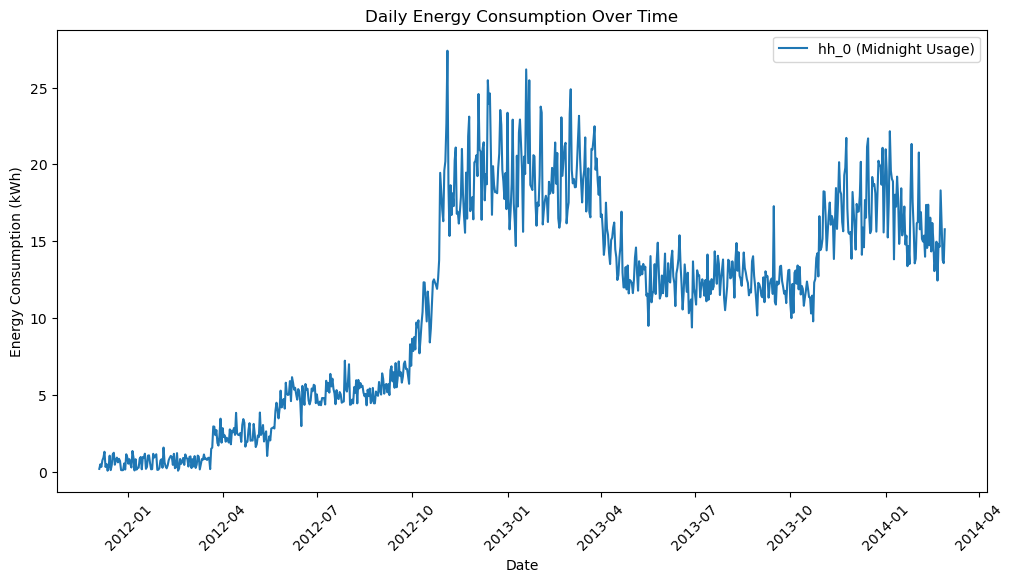

In [84]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Define the file path
block_data_path = Path("data/london_smart_meters/hhblock_dataset")
block_file = block_data_path / "block_0.csv"

# Check if the file exists
if block_file.exists():
    block_1 = pd.read_csv(block_file, parse_dates=False)
    block_1['day'] = pd.to_datetime(block_1['day'], yearfirst=True)
    print("✅ File found and loaded.")
else:
    print(f"❌ File not found: {block_file}")
    print("🔧 Make sure the dataset is uploaded and the path is correct.")
    block_1 = None

if block_1 is not None:
    # Check the columns in the DataFrame
    print("Columns in block_1:", block_1.columns)

    # Fill NaN values to avoid issues during aggregation
    df_cleaned = block_1.fillna(0)

    # Verify if 'hh_0' exists before aggregation
    if 'hh_0' in df_cleaned.columns:
        # Aggregate data by day
        df_grouped = df_cleaned.groupby("day").sum()

        # Plot the aggregated data
        plt.figure(figsize=(12, 6))
        plt.plot(df_grouped.index, df_grouped["hh_0"], label="hh_0 (Midnight Usage)")
        plt.xlabel("Date")
        plt.ylabel("Energy Consumption (kWh)")
        plt.title("Daily Energy Consumption Over Time")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("Warning: 'hh_0' column not found. Using the first available numeric column.")
        numeric_cols = df_cleaned.select_dtypes(include='number').columns
        if len(numeric_cols) > 0:
            first_numeric_col = numeric_cols[0]
            print(f"Using column: {first_numeric_col}")

            # Aggregate data and plot using the first numeric column
            df_grouped = df_cleaned.groupby("day").sum()
            plt.figure(figsize=(12, 6))
            plt.plot(df_grouped.index, df_grouped[first_numeric_col], label=first_numeric_col)
            plt.xlabel("Date")
            plt.ylabel("Energy Consumption (kWh)")
            plt.title("Daily Energy Consumption Over Time")
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("No numeric columns available for plotting.")
else:
    print("Error: No data available for processing.")




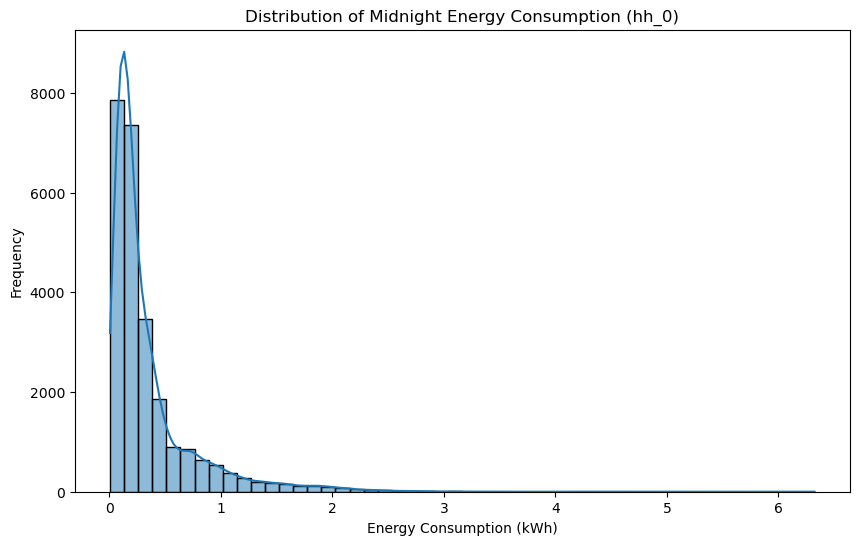

In [85]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["hh_0"], bins=50, kde=True)
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Midnight Energy Consumption (hh_0)")
plt.show()
